# Capstone Project - The Battle of Neighborhoods #




# New Chinese restaurant locations in Paris 

**This notebook contains multiple parts:**

1. A description of the problem and a discussion of the background - Week 1

2. A description of the data and how it will be used to solve the problem - Week 1


3. Methodology and Exploratory Data Analysis - Week 2

4. Inferences and Discussion - Week 2

The seperate report goes into more decription of the methodology. This notebook gives only brief outlines of the methodology of each step, but includes all the code, dataframes and visualisations.

# _1 Introduction and Discussion of the Business Objective and Problem_ #


![Paris Store](https://github.com/YuyingTan/The-Battle-of-Neighborhoods/blob/master/la-belle-chine.jpg?raw=true)

## Locations for New Chinese restaurant locations in Paris France ##



**The Task At Hand**

There are many Chinese or Chinese food lover in the captical city of France - Paris. 

I've been given the exciting task of assisting one Chinese chain restaurant owner to make data-driven decisions on the new locations that are most suitable for openning a new Chinese restaurant in Paris.

We believe that in high traffic areas where consumers go for shopping, restaurants and entertainment will be ideal place for the new restaurant. Foursquare data will be very helpful in making data-driven decisions about the best of those areas.

**Criteria**

Qualitative data from another retailer that they know, suggests that the best locations to open new restaurant may not only be where other restaurant is located. This data strongly suggests that the best places are in fact areas that are near **_French Restaurants, Cafés and Wine Bars_**. Parisians are very social people that frequent these place often, so opening new restaurant in these locations is becoming popular. 

The analysis and recommendations for new restaurant locations will focus on general districts with these establishments, not on specific addresses. 

**Why Data?**

Without leveraging data to make decisions about new store locations, the restaurant owner could spend countless hours walking around districts, consulting many real estate agents with their own district biases, and end up opening in yet another location that is not ideal. 

Data will provide better answers and better solutions to their task at hand. 

**Outcomes**

The goal is to identify the best districts - _Arrondissements_ - to open new restaurant. 

# _2 The Data Science Workflow_ #


**Data Requirements**

The main districts in Paris are divided into 20 _Arrondissements Municipaux_ (administrative districts), shortened to _arrondissements_. 

The data regarding the districts in Paris needs to be researched and a suitable useable source identified. If it is found but is not in a useable form, data wrangling and cleaning will have to be performed. 

The cleansed data will then be used alongside Foursquare data, which is readily available. Foursquare location data will be leveraged to explore or compare districts around Paris, identifying the high traffic areas where consumers go for shopping, dining and entertainment - the areas where the fashion brand are most interested in opening new stores.

**The Data Science Workflow for Part 1 & 2 includes the following:**

- **Outline the initial data that is required:**
 - District data for Paris including names, location data if available, and any other details required.


- **Obtain the Data:**
 - Research and find suitable sources for the district data for Paris.
 - Access and explore the data to determine if it can be manipulated for our purposes.
 
 
- **Initial Data Wrangling and Cleaning:**
 - Clean the data and convert to a useable form as a dataframe.
 
 



**The Data Science Workflow for parts 3 & 4 includes:**

- **Data Analysis and Location Data:**
 
 - Foursquare location data will be leveraged to explore or compare districts around Paris.

 - Data manipulation and analysis to derive subsets of the initial data.
 
 - Identifying the high traffic areas using data visualisation and tatistical nalysis.


- **Visualization:**

 - Analysis and plotting visualizations.

 - Data visualization using various mapping libraries.
 

- **Discussion and Conclusions:**

 - Recomendations and results based on the data analysis.
 
 - Discussion of any limitations and how the results can be used, and any conclusions that can be drawn.
 


**Import the Required Libraries**

In [1]:
# Import libraries
import numpy as np # library to handle data in a vectorized manner
import json # library to handle JSON files
import pandas as pd

!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors

from bs4 import BeautifulSoup

# Import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes 
import folium # map rendering library

print('Libraries imported.')

Solving environment: ...working... done

# All requested packages already installed.

Solving environment: ...working... done

# All requested packages already installed.

Libraries imported.


# Data Research and Preparation #

## Import the Paris District Data ##

#### Arrondissements Municipaux for Paris CSV (administrative districts) ####

Paris is divided into 20 Arrondissements Municipaux (or administrative districts), shortened to just arrondissements. They and normally referenced by the arrondissement number rather than a name.

Data for the arrondissements is necessary to select the most suitable of these areas for new stores. 

Initially looking to get this data by scraping the relevent Wikipedia page (https://en.wikipedia.org/wiki/Arrondissements_of_Paris), fortunately, after much research, this data is available on the web and can be manipulated and cleansed to provide a meaningful dataset to use. 

Data from Open|DATA France: https://opendata.paris.fr/explore/dataset/arrondissements/table/?dataChart

Also available from Opendatasoft: https://data.opendatasoft.com/explore/dataset/arrondissements%40parisdata/export/


In [3]:
# Download the dataset and read it into a pandas dataframe.

# The Arrondissements dataset was downloaded from Paris|DATA:  https://opendata.paris.fr/explore/dataset/arrondissements/table/?dataChart
# Then placed on the GitHub repo for the project.
# https://raw.githubusercontent.com/AR-data-science/Coursera_Capstone/master/Arrondissements_.csv

paris = pd.read_csv('https://raw.githubusercontent.com/YuyingTan/The-Battle-of-Neighborhoods/master/Arrondissements_.csv')
paris

,CAR,NAME,NSQAR,CAR.1,CARINSEE,LAR,NSQCO,SURFACE,PERIMETRE,Geometry_X,Geometry_Y
0,3,Temple,750000003,3,3,3eme Ardt,750001537,1170882828,4519264,48.862872,2.360001
1,19,Buttes-Chaumont,750000019,19,19,19eme Ardt,750001537,6792651129,11253182,48.887076,2.384821
2,14,Observatoire,750000014,14,14,14eme Ardt,750001537,5614877309,10317483,48.829245,2.326542
3,10,Entrepot,750000010,10,10,10eme Ardt,750001537,2891739442,6739375,48.876130,2.360728
4,12,Reuilly,750000012,12,12,12eme Ardt,750001537,16314782637,24089666,48.834974,2.421325
5,16,Passy,750000016,16,16,16eme Ardt,750001537,16372542129,17416110,48.860392,2.261971
6,11,Popincourt,750000011,11,11,11eme Ardt,750001537,3665441552,8282012,48.859059,2.380058
7,2,Bourse,750000002,2,2,2eme Ardt,750001537,991153745,4554104,48.868279,2.342803
8,4,Hotel-de-Ville,750000004,4,4,4eme Ardt,750001537,1600585632,5420908,48.854341,2.357630
9,17,Batignolles-Monceau,750000017,17,17,17eme Ardt,750001537,5668834504,10775580,48.887327,2.306777


## Exploring, Wrangling and Cleaning the Data ##

### Rename the columns 'Geometry_X' and 'Geometry_Y', "CAR' to 'Arrondissement'  etc... ###


In [4]:
# Rename the necessary columns 'Geometry_X and Geometry_Y' etc...

# District : name of the central District for the Arrondissement
# Arrondissement : the Arrondissement or district number which is used to identify it
# Arrondissement_Fr : the descriptive French label for each Arrondissement

paris.rename(columns={'NAME': 'Neighborhood ', 'CAR': 'Arrondissement_Num', 'Geometry_X': 'Latitude', 'Geometry_Y': 'Longitude',  'LAR': 'French_Name'}, inplace=True)
paris

,Arrondissement_Num,Neighborhood,NSQAR,CAR.1,CARINSEE,French_Name,NSQCO,SURFACE,PERIMETRE,Latitude,Longitude
0,3,Temple,750000003,3,3,3eme Ardt,750001537,1170882828,4519264,48.862872,2.360001
1,19,Buttes-Chaumont,750000019,19,19,19eme Ardt,750001537,6792651129,11253182,48.887076,2.384821
2,14,Observatoire,750000014,14,14,14eme Ardt,750001537,5614877309,10317483,48.829245,2.326542
3,10,Entrepot,750000010,10,10,10eme Ardt,750001537,2891739442,6739375,48.876130,2.360728
4,12,Reuilly,750000012,12,12,12eme Ardt,750001537,16314782637,24089666,48.834974,2.421325
5,16,Passy,750000016,16,16,16eme Ardt,750001537,16372542129,17416110,48.860392,2.261971
6,11,Popincourt,750000011,11,11,11eme Ardt,750001537,3665441552,8282012,48.859059,2.380058
7,2,Bourse,750000002,2,2,2eme Ardt,750001537,991153745,4554104,48.868279,2.342803
8,4,Hotel-de-Ville,750000004,4,4,4eme Ardt,750001537,1600585632,5420908,48.854341,2.357630
9,17,Batignolles-Monceau,750000017,17,17,17eme Ardt,750001537,5668834504,10775580,48.887327,2.306777


### Clean up the dataset to remove unnecessary columns ###

In [5]:
# Clean up the dataset to remove unnecessary columns.
# Some of the columns are for mapping software - not required here.

paris.drop(['NSQAR','CAR.1','CARINSEE','NSQCO','SURFACE', 'PERIMETRE' ], axis=1, inplace=True)
paris

,Arrondissement_Num,Neighborhood,French_Name,Latitude,Longitude
0,3,Temple,3eme Ardt,48.862872,2.360001
1,19,Buttes-Chaumont,19eme Ardt,48.887076,2.384821
2,14,Observatoire,14eme Ardt,48.829245,2.326542
3,10,Entrepot,10eme Ardt,48.876130,2.360728
4,12,Reuilly,12eme Ardt,48.834974,2.421325
5,16,Passy,16eme Ardt,48.860392,2.261971
6,11,Popincourt,11eme Ardt,48.859059,2.380058
7,2,Bourse,2eme Ardt,48.868279,2.342803
8,4,Hotel-de-Ville,4eme Ardt,48.854341,2.357630
9,17,Batignolles-Monceau,17eme Ardt,48.887327,2.306777




## Week 1: 
## Discussion of the Business Objective and Problem / The Data Workflow ##

We now have located and imported the relevant data for the districts of Paris, and have constructed a dataframe.

Our business objective, strategy and methods to achieve our goal have been laid out, and a data workflow established.

Next up, we will leverage Foursquare location data to obtain data on high traffic areas - where consumers go for shopping, restaurants and entertainment - in all of the 20 districts.

The Battle of Neighborhoods continues in the next section.



# Week 2 - Data Analysis #




# _3 Methodology and Exploratory Data Analysis_ ##

**The Data Science Workflow for parts 3 & 4 includes:**

- **Data Analysis and Location Data:**
 
 - Foursquare location data will be leveraged to explore or compare districts around Paris.

 - Data manipulation and analysis to derive subsets of the initial data.
 
 - Identifying the high traffic areas using data visualisation and tatistical nalysis.


- **Visualization:**

 - Analysis and plotting visualizations.

 - Data visualization using various mapping libraries.
 

- **Discussion and Conclusions:**

 - Recomendations and results based on the data analysis.
 
 - Discussion of any limitations and how the results can be used, and any conclusions that can be drawn.
 


In [6]:
# Check the shape of the dataframe
paris.shape

(20, 5)

### Use the geopy library to get the latitude and longitude values of Paris ###


In [7]:
# Retrieve the Latitude and Longitude for Paris
from geopy.geocoders import Nominatim 

address = 'Paris'

# Define the user_agent as Paris_explorer
geolocator = Nominatim(user_agent="Paris_explorer")

location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude

print('The geographical coordinates of Paris France are {}, {}.'.format(latitude, longitude))

The geographical coordinates of Paris France are 48.8566969, 2.3514616.


### Create a map of Paris with districts superimposed ###


In [8]:
# create map of Paris using the above latitude and longitude values
map_paris = folium.Map(location=[latitude, longitude], zoom_start=12)


# add markers to map
for lat, lng, label in zip(paris['Latitude'], paris['Longitude'], paris['French_Name']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=25,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.3,
        parse_html=False).add_to(map_paris)  
    
map_paris

## Use the Foursquare API to explore the Arrondissements of Paris (Neighborhoods) ##
Define Foursquare Credentials and Version

In [9]:
CLIENT_ID = 'WVOJKB5M51DKBGHUHMFRU2BDTECI2SVSTOF1HKUEIJ2DMKKG' # your Foursquare ID
CLIENT_SECRET = 'GPTFBUMEBZERXWCVSOVLV0WORMJZAODBUHUSP534ID3KX2WJ' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: WVOJKB5M51DKBGHUHMFRU2BDTECI2SVSTOF1HKUEIJ2DMKKG
CLIENT_SECRET:GPTFBUMEBZERXWCVSOVLV0WORMJZAODBUHUSP534ID3KX2WJ


# Exploratory data analysis #
### Explore the first district in our dataframe to become familiar with the data (use the French descriptive arrondissement name) ###


In [10]:
# Explore the first Neighborhood in our dataframe.
# Get the Neighborhood's French name.

paris.loc[0, 'French_Name']
paris.loc[0, 'French_Name']

'3eme Ardt'

### The first arrondissement is identified as _3eme Ardt_ ###

In [11]:
# Get the Neighborhood's latitude and longitude values.

neighborhood_latitude = paris.loc[0, 'Latitude'] # Neighborhood latitude value
neighborhood_longitude = paris.loc[0, 'Longitude'] # Neighborhood longitude value

neighborhood_name = paris.loc[0, 'French_Name'] # Neighborhood name

print('Latitude and longitude values of the neighborhood {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of the neighborhood 3eme Ardt are 48.86287238, 2.3600009859999997.


### Get the top 100 venues that are in the neighborhood _3eme Ardt_ within a radius of 500 meters ###

In [12]:
LIMIT = 100 # limit of number of venues returned by Foursquare API
radius = 500 # define radius

url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)
url # displays the URL

'https://api.foursquare.com/v2/venues/explore?&client_id=WVOJKB5M51DKBGHUHMFRU2BDTECI2SVSTOF1HKUEIJ2DMKKG&client_secret=GPTFBUMEBZERXWCVSOVLV0WORMJZAODBUHUSP534ID3KX2WJ&v=20180605&ll=48.86287238,2.3600009859999997&radius=500&limit=100'

In [15]:
# Send the GET request and examine the resutls

results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5e89e16669babe001ba18580'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Enfants-Rouges',
  'headerFullLocation': 'Enfants-Rouges, Paris',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 112,
  'suggestedBounds': {'ne': {'lat': 48.8673723845, 'lng': 2.3668285468065267},
   'sw': {'lat': 48.8583723755, 'lng': 2.353173425193473}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4d974096a2c654814aa6d353',
       'name': 'Mmmozza',
       'location': {'address': '57 rue de Bretagne',
        'lat': 48.86391016055883,
        'lng': 2.360590696334839,
        'labeledLatLngs': [{'label': 'display',
          'lat': 48.863910160558

### Define the function that extracts the category of the venue ###


In [16]:
# define a function that extracts the category of the venue

def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

### Structure the json file into a pandas dataframe ###

In [17]:
# clean the json and structure it into a pandas dataframe.

venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head(20)

,name,categories,lat,lng
0,Mmmozza,Sandwich Place,48.863910,2.360591
1,Marché des Enfants Rouges,Farmers Market,48.862806,2.361996
2,Chez Alain Miam Miam,Sandwich Place,48.862369,2.361950
3,Chez Alain Miam Miam,Sandwich Place,48.862781,2.362064
4,Square du Temple,Park,48.864475,2.360816
5,Fromagerie Jouannault,Cheese Shop,48.862947,2.362530
6,Hôtel Jules & Jim,Hotel,48.863496,2.357395
7,Les Enfants Rouges,Wine Bar,48.863013,2.361260
8,Chez Taeko,Japanese Restaurant,48.862734,2.362136
9,Okomusu,Okonomiyaki Restaurant,48.861453,2.360879


In [18]:
# Check how many venues there are in 3eme Ardt within a radius of 500 meters

print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

100 venues were returned by Foursquare.


### Create a nearby venues function for all the neighborhoods in Paris ###


In [19]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['French_Name', 
                  'Latitude', 
                  'Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

### Create a new dataframe called for the venues of Paris called _paris-venues_ ###

In [20]:
# Create a new dataframe called paris_venues.

paris_venues = getNearbyVenues(names=paris['French_Name'],
                                   latitudes=paris['Latitude'],
                                   longitudes=paris['Longitude']
                                  )

3eme Ardt
19eme Ardt
14eme Ardt
10eme Ardt
12eme Ardt
16eme Ardt
11eme Ardt
2eme Ardt
4eme Ardt
17eme Ardt
18eme Ardt
1er Ardt
5eme Ardt
7eme Ardt
20eme Ardt
8eme Ardt
9eme Ardt
13eme Ardt
15eme Ardt
6eme Ardt


In [33]:
print(paris_venues.shape)
paris_venues.head(250)

(1318, 7)


,French_Name,Latitude,Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,3eme Ardt,48.862872,2.360001,Mmmozza,48.863910,2.360591,Sandwich Place
1,3eme Ardt,48.862872,2.360001,Marché des Enfants Rouges,48.862806,2.361996,Farmers Market
2,3eme Ardt,48.862872,2.360001,Chez Alain Miam Miam,48.862369,2.361950,Sandwich Place
3,3eme Ardt,48.862872,2.360001,Chez Alain Miam Miam,48.862781,2.362064,Sandwich Place
4,3eme Ardt,48.862872,2.360001,Square du Temple,48.864475,2.360816,Park
...,...,...,...,...,...,...,...
295,11eme Ardt,48.859059,2.380058,Atelier des Lumières,48.861659,2.380911,Art Museum
296,11eme Ardt,48.859059,2.380058,Comestibles & Marchand de Vins,48.861343,2.378424,Restaurant
297,11eme Ardt,48.859059,2.380058,Broken Biscuits,48.859792,2.378764,Pastry Shop
298,11eme Ardt,48.859059,2.380058,Square Maurice Gardette,48.861708,2.379076,Park


### Check how many venues were returned for each neighborhood ###
Please be aware of the 100 venue limit imposed by the free Foursquare account.


In [22]:
paris_venues.groupby('French_Name').count()

,Latitude,Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
French_Name,,,,,,
10eme Ardt,100,100,100,100,100,100
11eme Ardt,71,71,71,71,71,71
12eme Ardt,5,5,5,5,5,5
13eme Ardt,60,60,60,60,60,60
14eme Ardt,25,25,25,25,25,25
15eme Ardt,61,61,61,61,61,61
16eme Ardt,12,12,12,12,12,12
17eme Ardt,57,57,57,57,57,57
18eme Ardt,44,44,44,44,44,44


### Calculate how many unique venue categories there are ###

In [23]:
# Calculate how many unique categories there are.
print('There are {} unique venue categories.'.format(len(paris_venues['Venue Category'].unique())))

There are 196 unique venue categories.


### Analyze each of the Neighborhoods ###


In [24]:
# Analyze each of the Neighborhoods from the results

# one hot encoding
paris_onehot = pd.get_dummies(paris_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
paris_onehot['Neighborhood'] = paris_venues['French_Name'] 

# move neighborhood column to the first column
fixed_columns = [paris_onehot.columns[-1]] + list(paris_onehot.columns[:-1])
paris_onehot = paris_onehot[fixed_columns]

paris_onehot

,Neighborhood,Afghan Restaurant,African Restaurant,American Restaurant,Antique Shop,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,...,Udon Restaurant,Vegetarian / Vegan Restaurant,Venezuelan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Wine Shop,Women's Store,Zoo,Zoo Exhibit
0,3eme Ardt,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3eme Ardt,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3eme Ardt,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3eme Ardt,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,3eme Ardt,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1313,6eme Ardt,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1314,6eme Ardt,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1315,6eme Ardt,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1316,6eme Ardt,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [25]:
# The shape of the dataframe is
paris_onehot.shape

(1318, 197)

### Group rows by neighborhood and take the mean of the frequency of occurrence of each category


In [26]:
paris_grouped = paris_onehot.groupby('Neighborhood').mean().reset_index()
paris_grouped

,Neighborhood,Afghan Restaurant,African Restaurant,American Restaurant,Antique Shop,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,...,Udon Restaurant,Vegetarian / Vegan Restaurant,Venezuelan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Wine Shop,Women's Store,Zoo,Zoo Exhibit
0,10eme Ardt,0.000000,0.020000,0.000000,0.00,0.00,0.000000,0.000000,0.000000,0.020000,...,0.00,0.010000,0.00,0.000000,0.000000,0.020000,0.020000,0.000000,0.0,0.0
1,11eme Ardt,0.014085,0.000000,0.000000,0.00,0.00,0.000000,0.014085,0.000000,0.014085,...,0.00,0.014085,0.00,0.014085,0.014085,0.042254,0.000000,0.014085,0.0,0.0
2,12eme Ardt,0.000000,0.000000,0.000000,0.00,0.00,0.000000,0.000000,0.000000,0.000000,...,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.2,0.2
3,13eme Ardt,0.000000,0.000000,0.000000,0.00,0.00,0.000000,0.000000,0.000000,0.200000,...,0.00,0.000000,0.00,0.000000,0.216667,0.000000,0.000000,0.000000,0.0,0.0
4,14eme Ardt,0.000000,0.000000,0.000000,0.00,0.00,0.000000,0.000000,0.000000,0.000000,...,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
5,15eme Ardt,0.000000,0.000000,0.000000,0.00,0.00,0.000000,0.000000,0.016393,0.000000,...,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.016393,0.016393,0.0,0.0
6,16eme Ardt,0.000000,0.000000,0.000000,0.00,0.00,0.000000,0.083333,0.000000,0.000000,...,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
7,17eme Ardt,0.000000,0.000000,0.000000,0.00,0.00,0.000000,0.017544,0.000000,0.000000,...,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
8,18eme Ardt,0.000000,0.000000,0.000000,0.00,0.00,0.000000,0.000000,0.000000,0.000000,...,0.00,0.000000,0.00,0.000000,0.045455,0.022727,0.000000,0.000000,0.0,0.0
9,19eme Ardt,0.000000,0.021739,0.021739,0.00,0.00,0.000000,0.000000,0.000000,0.000000,...,0.00,0.000000,0.00,0.000000,0.021739,0.000000,0.021739,0.000000,0.0,0.0


In [27]:
# The shape of the grouped data is
paris_grouped.shape

(20, 197)

### Print each neighborhood with it's top 10 most common venues ###

In [28]:
# Each  neighborhood with top 10 most common venues

num_top_venues = 10

for hood in paris_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = paris_grouped[paris_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----10eme Ardt----
                 venue  freq
0    French Restaurant  0.12
1                Hotel  0.05
2          Coffee Shop  0.05
3                 Café  0.04
4    Indian Restaurant  0.04
5               Bistro  0.04
6  Japanese Restaurant  0.03
7          Pizza Place  0.03
8                  Bar  0.03
9   Italian Restaurant  0.02


----11eme Ardt----
                venue  freq
0   French Restaurant  0.10
1                Café  0.07
2         Supermarket  0.06
3          Restaurant  0.06
4         Pastry Shop  0.04
5            Wine Bar  0.04
6        Cocktail Bar  0.03
7         Pizza Place  0.03
8  Italian Restaurant  0.03
9             Theater  0.03


----12eme Ardt----
                     venue  freq
0              Zoo Exhibit   0.2
1                     Park   0.2
2                      Zoo   0.2
3      Monument / Landmark   0.2
4              Supermarket   0.2
5              Music Store   0.0
6  New American Restaurant   0.0
7                Nightclub   0.0
8             N

### Put that data into a pandas dataframe and sort the venues in descending order ###

In [29]:
# First sort the venues in descending order.

def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

## The top 10 venue categories for each neighborhood ##
This is a very useful results table that can provide at a glance information for all of the districts. Even once any conclusions are drawn further into the data workflow, we can refer back to this table for meaaningful insights about the top categories of businesses in all the neighbourhoods. Even without actual counts and numbers, it makes a great reference table for the client.

In [30]:
# create the new dataframe and display the top 10 venues for each neighborhood

num_top_venues = 10
indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))
        
# create a new dataframe
paris_venues_sorted = pd.DataFrame(columns=columns)
paris_venues_sorted['Neighborhood'] = paris_grouped['Neighborhood']

for ind in np.arange(paris_grouped.shape[0]):
    paris_venues_sorted.iloc[ind, 1:] = return_most_common_venues(paris_grouped.iloc[ind, :], num_top_venues)

paris_venues_sorted.head(20)

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,10eme Ardt,French Restaurant,Coffee Shop,Hotel,Bistro,Indian Restaurant,Café,Japanese Restaurant,Bar,Pizza Place,Cocktail Bar
1,11eme Ardt,French Restaurant,Café,Supermarket,Restaurant,Pastry Shop,Wine Bar,Bakery,Cocktail Bar,Bistro,Pizza Place
2,12eme Ardt,Zoo Exhibit,Zoo,Supermarket,Park,Monument / Landmark,Donut Shop,Flower Shop,Fish & Chips Shop,Fast Food Restaurant,Farmers Market
3,13eme Ardt,Vietnamese Restaurant,Asian Restaurant,Thai Restaurant,Chinese Restaurant,French Restaurant,Juice Bar,Cosmetics Shop,Butcher,Cambodian Restaurant,Creperie
4,14eme Ardt,French Restaurant,Hotel,Supermarket,Pizza Place,Bakery,Food & Drink Shop,Brasserie,Convenience Store,Bistro,Sushi Restaurant
5,15eme Ardt,Italian Restaurant,Hotel,French Restaurant,Coffee Shop,Bakery,Lebanese Restaurant,Japanese Restaurant,Bistro,Thai Restaurant,Brasserie
6,16eme Ardt,Plaza,Lake,Park,Pool,French Restaurant,Bus Station,Art Museum,Bus Stop,Boat or Ferry,Dive Bar
7,17eme Ardt,French Restaurant,Hotel,Italian Restaurant,Café,Bakery,Japanese Restaurant,Bistro,Plaza,Sushi Restaurant,Restaurant
8,18eme Ardt,French Restaurant,Bar,Hotel,Convenience Store,Pizza Place,Coffee Shop,Vietnamese Restaurant,Restaurant,Seafood Restaurant,Bistro
9,19eme Ardt,Bar,French Restaurant,Supermarket,Hotel,Seafood Restaurant,Café,Bistro,Brewery,Beer Bar,Pizza Place


In [31]:
# The shape of the sorted data is
paris_venues_sorted.shape

(20, 11)

## The business types criteria specified by the client!   _'French Restaurants', 'Cafés' and 'Wine Bars'_

### Let's look at their frequency of occurance for all the Paris neighborhoods, isolating the categorical venues ### 
These are the venue types that the owner wants to have an abundant density of in the ideal restaurant locations. I've used a violin plot from the seaborn library - it is a great way to visualise frequency distribution datasets, they display a density estimation of the underlying distribution.

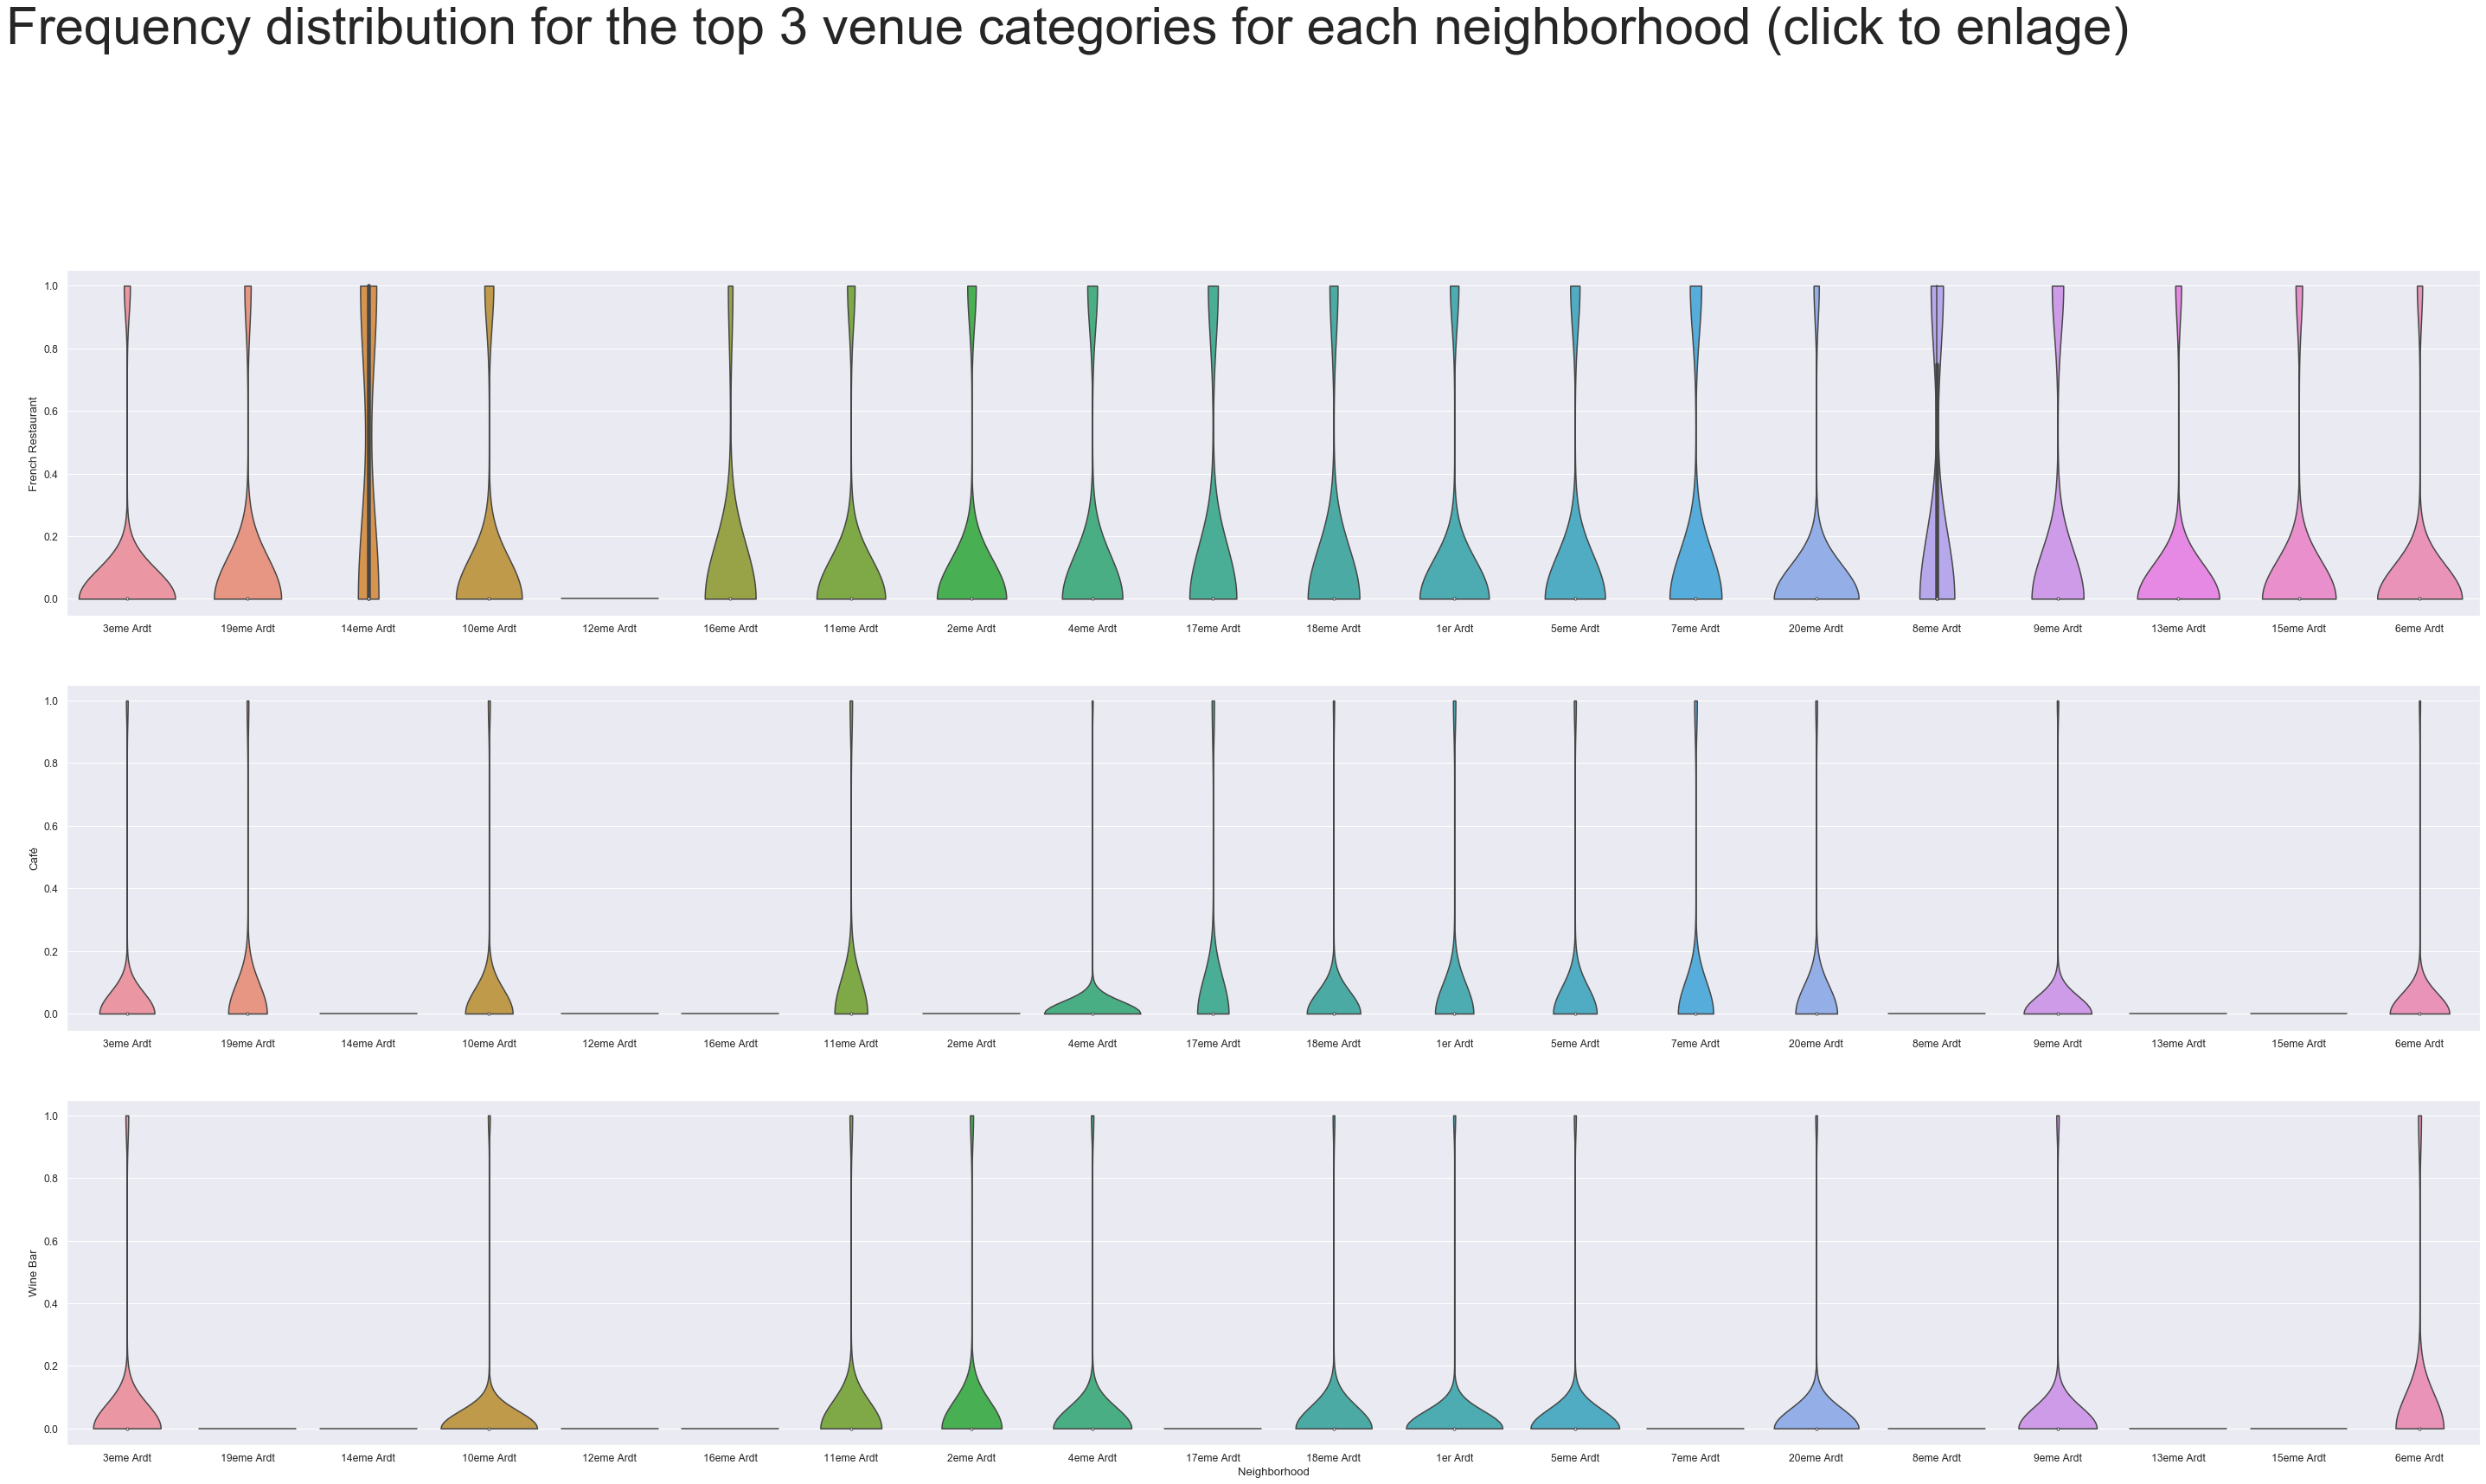

In [32]:
# Categorical plot
# Explore a plot of this data (a violin plot is used which is a density estimation of the underlying distribution).
# The top 3 venue types as specified by the client for each neighborhood are used for the plotting.

import seaborn as sns

fig = plt.figure(figsize=(50,25))
sns.set(font_scale=1.1)

ax = plt.subplot(3,1,1)
sns.violinplot(x="Neighborhood", y="French Restaurant", data=paris_onehot, cut=0);
plt.xlabel("")

ax = plt.subplot(3,1,2)
sns.violinplot(x="Neighborhood", y="Café", data=paris_onehot, cut=0);
plt.xlabel("")

plt.subplot(3,1,3)
sns.violinplot(x="Neighborhood", y="Wine Bar", data=paris_onehot, cut=0);

ax.text(-1.0, 3.1, 'Frequency distribution for the top 3 venue categories for each neighborhood (click to enlage)', fontsize=60)
plt.savefig ("Distribution_Frequency_Venues_3_categories.png", dpi=240)
plt.show()

## The Neighborhoods ## 
We suggest to open new restaurant in the most density restaurant places, and the best with cafe and bar. They are as follows:

**Neighborhoods**


 - **3eme Ardt**
 - **10eme Ardt**
 - **11eme Ardt**

 

# _4 Inferences and Discussion_ #



# Chosen Neighborhoods - Results #
Based on above analysis we identy 3 best neighborhoods where there are lively with Restaurants, Cafés and Wine Bars. 

So the final  3 prospective neighborhoods for new store locations are where 4 criteria are met:

### - 3eme Ardt : Arrondissement 3, Temple
### - 10eme Ardt : Arrondissement 3, Entrepot
### - 11eme Ardt : Arrondissement 3, Popincourt



# Let's look at the 3 districts on a Paris map #

In [34]:
# The csv of the 3 chosen prospective neighborhoods was uploaded to GitHub for access and reference
# Download and put into a new dataframe called chosen_districts

chosen_districts = pd.read_csv('https://raw.githubusercontent.com/YuyingTan/The-Battle-of-Neighborhoods/master/Chosen.csv')
chosen_districts

,Arrondissement_Num,Neighborhood,French_Name,Latitude,Longitude
0,3,Temple,3eme Ardt,48.862872,2.360001
1,10,Entrepot,10eme Ardt,48.876130,2.360728
2,11,Popincourt,11eme Ardt,48.859059,2.380058


## Where are our chosen districts?   Let's visualise them on a map of Paris. ##

In [35]:
# Create a folium map of Paris with the 3 neighborhoods superimposed on the map
map_chosen_districts = folium.Map(location=[latitude, longitude], zoom_start=13)

# add markers to map
for lat, lng, label in zip(chosen_districts['Latitude'], chosen_districts['Longitude'], chosen_districts['French_Name']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=45,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.2,
        parse_html=False).add_to(map_chosen_districts)  
    
map_chosen_districts

### Or for a closer view of Central Paris ###

In [36]:
map_chosen_districts = folium.Map(location=[latitude, longitude], zoom_start=15)

# add markers to map
for lat, lng, label in zip(chosen_districts['Latitude'], chosen_districts['Longitude'], chosen_districts['French_Name']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=130,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.2,
        parse_html=False).add_to(map_chosen_districts)  
    
map_chosen_districts

## Observations ## 

I guess it's not a surprise that these districts are all very centrally located in the circular arrangement of Paris's arrondissements. Locations fitting the criteria for popular venues would normally be in central locations in many cities of the world. 



## Conclusions ##

This analysis model can successfully find the best location for new Chinese restaurant in the most high traffic places surrended with shopping centers, restaurants, bars and cafes in Paris.

As extension, we can adapt this methodology to other kinds of location peoblem in paris. Restaurant, store, bar, cafe etc. in everywhere in the world.

And we can take more factors into consideration according to client's request. 

There are many ways this analysis could have been performed based on different methodolgy, machine learning algorithms and different data sources.
